# Recommendation System for Product and Customer analytics

#### Customer Purchase Behavior and Repeat Customer Analysis Using Python

In [50]:
# Q1. Load the Online Retail dataset and display the first ten records
retail = pd.read_excel('Dataset/Online_Retail.xlsx')
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [51]:
# Q2. Determine the total number of rows and columns
print(f"Rows: {retail.shape[0]}, Columns: {retail.shape[1]}")

Rows: 541909, Columns: 8


In [52]:
# Q3. Examine for missing values, remove them, and explain
missing_cols = retail.columns[retail.isnull().any()]
print(f"Columns with missing data: {list(missing_cols)}")
retail_clean = retail.dropna()
print(f"Rows after removing missing values: {retail_clean.shape[0]}")
# Explanation: Removing missing values ensures data integrity and prevents errors in analysis and modeling.

Columns with missing data: ['Description', 'CustomerID']
Rows after removing missing values: 406829


In [53]:
# Q4. Filter for positive Quantity and UnitPrice, exclude Dec 2011, and justify
retail_clean = retail_clean[(retail_clean['Quantity'] > 0) & (retail_clean['UnitPrice'] > 0)]
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean = retail_clean[~((retail_clean['InvoiceDate'].dt.year == 2011) & (retail_clean['InvoiceDate'].dt.month == 12))]
# Justification: Negative/zero values indicate returns/errors; Dec 2011 may be incomplete or anomalous.

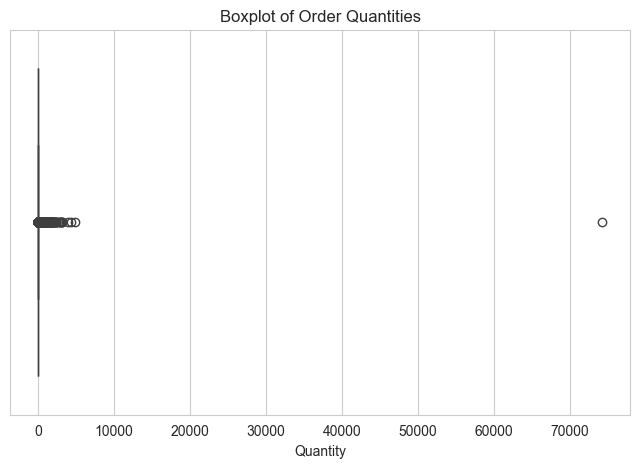

In [54]:
# Q5. Boxplot for Quantity distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=retail_clean['Quantity'])
plt.title('Boxplot of Order Quantities')
plt.xlabel('Quantity')
plt.show()
# Interpretation: The boxplot shows the spread, median, and outliers in order quantities.

C:\Users\navee\AppData\Local\Temp\ipykernel_16520\1423406855.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = retail_clean.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique()


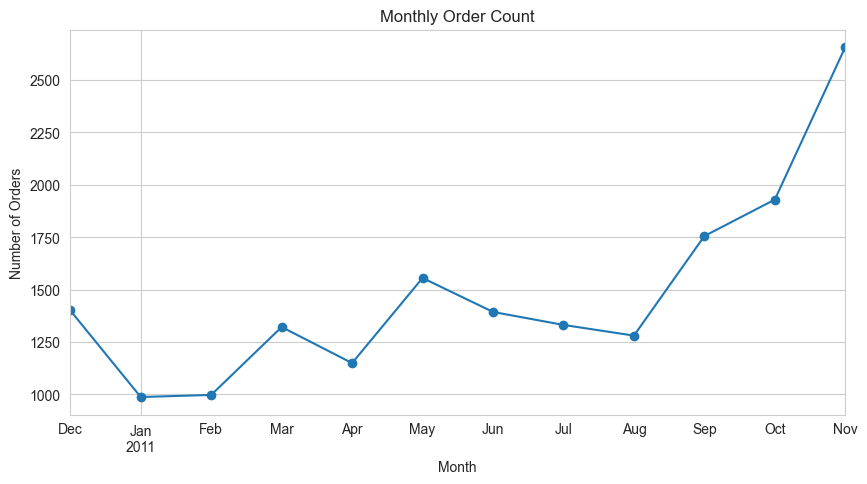

In [55]:
# Q6. Monthly order count time-series graph
monthly_orders = retail_clean.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique()
plt.figure(figsize=(10,5))
monthly_orders.plot(marker='o')
plt.title('Monthly Order Count')
plt.ylabel('Number of Orders')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [56]:
# Q7. Create a new column "Sales" for revenue
retail_clean['Sales'] = retail_clean['Quantity'] * retail_clean['UnitPrice']
retail_clean[['InvoiceNo', 'Quantity', 'UnitPrice', 'Sales']].head()

,InvoiceNo,Quantity,UnitPrice,Sales
0,536365,6,2.55,15.30
1,536365,6,3.39,20.34
2,536365,8,2.75,22.00
3,536365,6,3.39,20.34
4,536365,6,3.39,20.34


In [57]:
# Q8. Select variables and store in invoice_customer_df
invoice_customer_df = retail_clean[['InvoiceDate', 'InvoiceNo', 'Sales', 'CustomerID', 'Country']].copy()
invoice_customer_df.head()

,InvoiceDate,InvoiceNo,Sales,CustomerID,Country
0,2010-12-01 08:26:00,536365,15.30,17850.0,United Kingdom
1,2010-12-01 08:26:00,536365,20.34,17850.0,United Kingdom
2,2010-12-01 08:26:00,536365,22.00,17850.0,United Kingdom
3,2010-12-01 08:26:00,536365,20.34,17850.0,United Kingdom
4,2010-12-01 08:26:00,536365,20.34,17850.0,United Kingdom


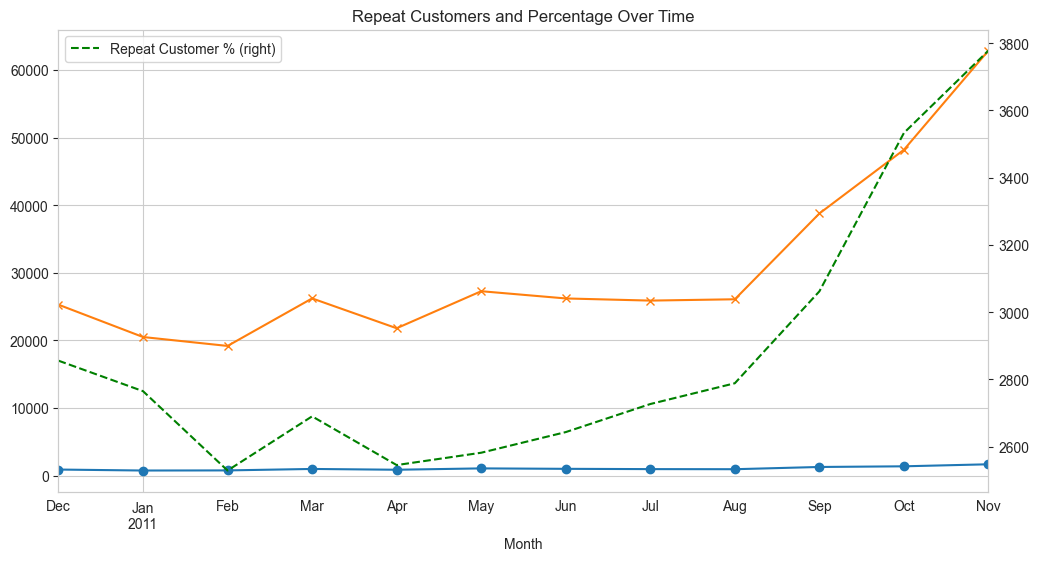

In [58]:
# Q9. Calculate and plot repeat customer percentage over time
invoice_customer_df['Month'] = invoice_customer_df['InvoiceDate'].dt.to_period('M')
monthly_customers = invoice_customer_df.groupby('Month')['CustomerID'].nunique()
repeat_customers = invoice_customer_df.groupby('Month')['CustomerID'].apply(lambda x: x.duplicated().sum())
repeat_pct = (repeat_customers / monthly_customers * 100).fillna(0)

plt.figure(figsize=(12,6))
monthly_customers.plot(label='Unique Customers', marker='o')
repeat_customers.plot(label='Repeat Customers', marker='x')
repeat_pct.plot(label='Repeat Customer %', secondary_y=True, style='g--')
plt.title('Repeat Customers and Percentage Over Time')
plt.legend(loc='upper left')
plt.show()

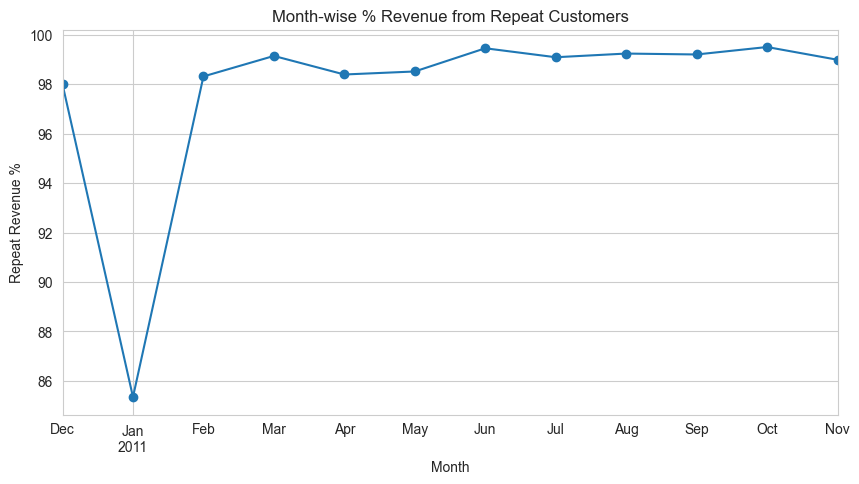

In [59]:
# Q10. Month-wise percentage of revenue from repeat customers and plot
invoice_customer_df['IsRepeat'] = invoice_customer_df.duplicated(['CustomerID', 'Month'], keep=False)
revenue_by_month = invoice_customer_df.groupby('Month')['Sales'].sum()
repeat_revenue_by_month = invoice_customer_df[invoice_customer_df['IsRepeat']].groupby('Month')['Sales'].sum()
repeat_revenue_pct = (repeat_revenue_by_month / revenue_by_month * 100).fillna(0)

plt.figure(figsize=(10,5))
repeat_revenue_pct.plot(marker='o')
plt.title('Month-wise % Revenue from Repeat Customers')
plt.ylabel('Repeat Revenue %')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [60]:
# Q11. Aggregate by InvoiceDate (monthly) and StockCode, rank items
monthly_item_qty = retail_clean.copy()
monthly_item_qty['Month'] = monthly_item_qty['InvoiceDate'].dt.to_period('M')
agg = monthly_item_qty.groupby(['Month', 'StockCode'])['Quantity'].sum().reset_index()

# Rank by last month and overall
target_month = agg['Month'].max()
rank_last_month = agg[agg['Month'] == target_month].sort_values('Quantity', ascending=False)
overall_rank = agg.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

print('Top items last month:')
print(rank_last_month.head())
print('\nTop items overall:')
print(overall_rank.head())
# Interpretation: Compare which items are consistently popular vs. those with recent spikes.

Top items last month:
         Month StockCode  Quantity
27069  2011-11     23084     12393
26329  2011-11     22197      8458
26240  2011-11     22086      5919
28087  2011-11    85099B      5678
27697  2011-11     84879      5190

Top items overall:
StockCode
23166     77729
84077     53052
85099B    45126
22197     43821
85123A    35980
Name: Quantity, dtype: int64


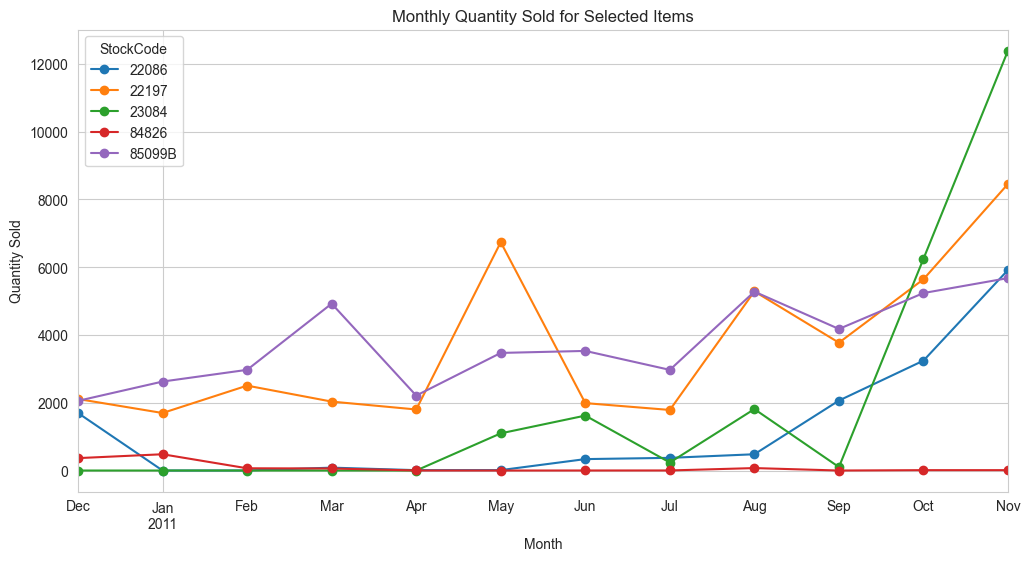

In [61]:
# Q12. Pivot table for selected StockCodes and multi-line time-series plot
selected_codes = [22086, 22197, 23084, 84826, '85099B']
pivot = agg[agg['StockCode'].isin(selected_codes)].pivot(index='Month', columns='StockCode', values='Quantity').fillna(0)

pivot.plot(figsize=(12,6), marker='o')
plt.title('Monthly Quantity Sold for Selected Items')
plt.ylabel('Quantity Sold')
plt.xlabel('Month')
plt.legend(title='StockCode')
plt.grid(True)
plt.show()
# Explanation: This analysis helps identify demand trends and supports inventory planning for key products.

#### Country-Wise Sales and Product Popularity Analysis Using Python

In [62]:
# 1. Load the Online Retail dataset and display the first ten records
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

retail_df = pd.read_excel('Dataset/Online_Retail.xlsx')
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [63]:
# 2. Remove observations with negative Quantity and explain
neg_qty_count = (retail_df['Quantity'] < 0).sum()
print(f"Number of records with negative Quantity: {neg_qty_count}")

# Remove negative Quantity
retail_df = retail_df[retail_df['Quantity'] >= 0]

# Explanation:
# Negative quantities often represent returns or data entry errors. For sales analysis, only positive sales should be included to reflect actual revenue generation.

Number of records with negative Quantity: 10624


In [64]:
# 3. Create a new column named "Sales" to compute revenue for each transaction
# Formula: Sales = Quantity * UnitPrice
retail_df['Sales'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df[['Quantity', 'UnitPrice', 'Sales']].head()

,Quantity,UnitPrice,Sales
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [65]:
# 4. Calculate total revenue by country and identify top country
total_sales_by_country = retail_df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print(total_sales_by_country)
print(f"\nTop-contributing country: {total_sales_by_country.idxmax()} with sales of {total_sales_by_country.max():.2f}")

Country
United Kingdom          9003097.964
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

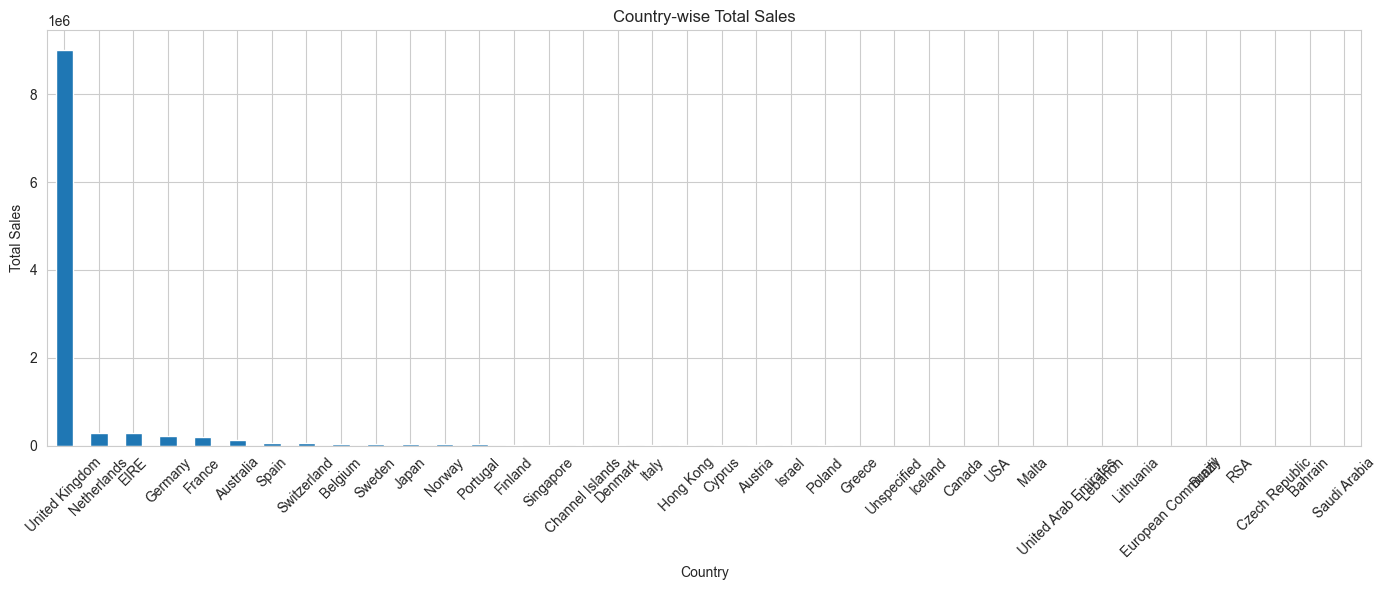

In [66]:
# 5. Visualize country-wise total sales using a bar plot
plt.figure(figsize=(14,6))
total_sales_by_country.plot(kind='bar')
plt.title('Country-wise Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation: The bar plot shows which countries contribute most to total sales.

In [67]:
# 6. Filter for United Kingdom customers only
df_uk = retail_df[retail_df['Country'] == 'United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [68]:
# 7. Most frequently purchased products in the UK
product_counts_uk = df_uk['Description'].value_counts().head(10)
print("Top 10 most frequently purchased products in the UK:")
print(product_counts_uk)

Top 10 most frequently purchased products in the UK:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2231
JUMBO BAG RED RETROSPOT               1960
REGENCY CAKESTAND 3 TIER              1711
PARTY BUNTING                         1615
LUNCH BAG RED RETROSPOT               1421
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG  BLACK SKULL.               1271
SET OF 3 CAKE TINS PANTRY DESIGN      1255
NATURAL SLATE HEART CHALKBOARD        1233
HEART OF WICKER SMALL                 1188
Name: count, dtype: int64


In [69]:
# 8. Number of orders placed by each customer in the UK
orders_per_customer_uk = df_uk.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
print("Orders per customer (UK):")
print(orders_per_customer_uk.head(10))

# Interpretation: Customers with higher order counts are more engaged or loyal.

Orders per customer (UK):
CustomerID
12748.0    210
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
16029.0     63
13408.0     62
18102.0     60
13798.0     57
Name: InvoiceNo, dtype: int64


In [70]:
# 9. Popular items sold during September 2011 (by total quantity)
# Convert InvoiceDate to datetime if not already
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
sep2011 = df_uk[(df_uk['InvoiceDate'].dt.year == 2011) & (df_uk['InvoiceDate'].dt.month == 9)]
popular_sep2011 = sep2011.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 popular items in September 2011 (UK):")
print(popular_sep2011)

Top 10 popular items in September 2011 (UK):
Description
JUMBO BAG RED RETROSPOT               4061
POPCORN HOLDER                        3756
60 CAKE CASES VINTAGE CHRISTMAS       2919
WORLD WAR 2 GLIDERS ASSTD DESIGNS     2747
ASSORTED COLOUR BIRD ORNAMENT         2712
JUMBO BAG VINTAGE DOILY               2618
JUMBO BAG PINK POLKADOT               2461
WHITE HANGING HEART T-LIGHT HOLDER    2405
PACK OF 72 RETROSPOT CAKE CASES       2346
PLEASE ONE PERSON METAL SIGN          2284
Name: Quantity, dtype: int64


C:\Users\navee\AppData\Local\Temp\ipykernel_16520\620209397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])


10. Discussion: Business Insights

- **Country-wise sales analysis** helps identify key markets and allocate resources efficiently. Top-contributing countries can be targeted for new products or marketing campaigns.
- **Customer order analysis** reveals loyal and high-value customers, enabling personalized offers and retention strategies.
- **Popular product identification** guides inventory management, promotional focus, and product development.

Overall, these analyses support data-driven decisions to maximize revenue, improve customer satisfaction, and optimize operations.

#### Collaborative Filtering Recommendation System

In [71]:
# Q1. Load the dataset and remove records with missing CustomerID
cf_df = pd.read_excel('Dataset/Online_Retail.xlsx')
cf_df = cf_df.dropna(subset=['CustomerID'])
cf_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [72]:
# Q2. Construct the Customer–Item Matrix (customers as rows, items as columns, aggregated purchase values)
customer_item_matrix = cf_df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# Q3. Convert to binary interaction matrix (1 if purchased, 0 otherwise)
binary_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
binary_matrix.head()

C:\Users\navee\AppData\Local\Temp\ipykernel_16520\3851281104.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)


StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
# Q4. Compute the User-to-User Similarity Matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = pd.DataFrame(
    cosine_similarity(binary_matrix),
    index=binary_matrix.index,
    columns=binary_matrix.index
)
user_similarity.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [75]:
# Q5. Identify the two users with the highest similarity score (excluding self-correlation)
user_similarity_no_diag = user_similarity.copy()
for i in user_similarity_no_diag.index:
    user_similarity_no_diag.loc[i, i] = 0
max_sim = user_similarity_no_diag.max().max()
user1, user2 = user_similarity_no_diag.stack().idxmax()
print(f"Highest similarity score: {max_sim:.4f} between users {user1} and {user2}")

Highest similarity score: 1.0000 between users 12908.0 and 16881.0


In [76]:
# Q6. Generate item recommendations for a selected customer using User-Based Collaborative Filtering
selected_customer = user1  # You can change this to any CustomerID
# Find the most similar user to the selected customer
most_similar_user = user_similarity_no_diag.loc[selected_customer].idxmax()
# Items purchased by the similar user but not by the selected customer
items_similar_user = set(binary_matrix.columns[binary_matrix.loc[most_similar_user] == 1])
items_selected_customer = set(binary_matrix.columns[binary_matrix.loc[selected_customer] == 1])
recommended_items = list(items_similar_user - items_selected_customer)
print(f"Recommended items for customer {selected_customer} (based on user {most_similar_user}):")
print(recommended_items[:10])

Recommended items for customer 12908.0 (based on user 16881.0):
[]


In [77]:
# Q7. Compute the Item-to-Item Similarity Matrix using cosine similarity
item_similarity = pd.DataFrame(
    cosine_similarity(binary_matrix.T),
    index=binary_matrix.columns,
    columns=binary_matrix.columns
)
item_similarity.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.063246,0.098907,0.095346,0.047673,0.076139,0.091050,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.00,0.070057
10080,0.000000,1.000000,0.000000,0.032774,0.045883,0.047836,0.000000,0.000000,0.082855,0.049541,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.00,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.060000,0.041703,0.060302,0.060302,0.096309,0.028793,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.000000
10125,0.090351,0.032774,0.057143,1.000000,0.042857,0.044682,0.043073,0.000000,0.051594,0.030849,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.071209
10133,0.063246,0.045883,0.060000,0.042857,1.000000,0.281494,0.045227,0.060302,0.072232,0.057585,...,0.0,0.0,0.0,0.037139,0.0,0.0,0.0,0.067648,0.05,0.016615


In [78]:
# Q8. Retrieve the top 10 most similar items to item 10002
item_code = 10002
similar_items = item_similarity.loc[item_code].drop(item_code).sort_values(ascending=False).head(10)
print(f"Top 10 items most similar to {item_code}:")
print(similar_items)

Top 10 items most similar to 10002:
StockCode
90103     0.223607
21826     0.197642
16010     0.182574
90101     0.182574
84535A    0.181369
21439     0.178885
21086     0.171293
22243     0.168882
22972     0.162103
21507     0.162103
Name: 10002, dtype: float64


In [79]:
# Q9. Final recommendation table: stock codes and descriptions for similar items
desc_lookup = cf_df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
recommendation_table = desc_lookup.loc[similar_items.index]
recommendation_table.reset_index(inplace=True)
recommendation_table.columns = ['StockCode', 'Description']
recommendation_table

,StockCode,Description
0,90103,PURPLE FRANGIPANI NECKLACE
1,21826,EIGHT PIECE DINOSAUR SET
2,16010,FOLDING CAMPING SCISSOR W/KNIF & S
3,90101,WHITE FRANGIPANI NECKLACE
4,84535A,ENGLISH ROSE NOTEBOOK A6 SIZE
5,21439,BASKET OF TOADSTOOLS
6,21086,SET/6 RED SPOTTY PAPER CUPS
7,22243,5 HOOK HANGER RED MAGIC TOADSTOOL
8,22972,CHILDREN'S SPACEBOY MUG
9,22972,CHILDRENS SPACEBOY MUG
